In [29]:
# imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import datetime
from pathlib import Path
import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import numpy as np
%matplotlib inline

In [2]:
# load env file
load_dotenv("C:\\Users\\thebe\\Fintech\\API_KEYS.env")

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = 'v2'
)

In [4]:
# initialize variables for api
ticker = "GLD"
timeframe = "1D"
current_date = datetime.datetime.now()
start_date = datetime.datetime(current_date.year-5, current_date.month, current_date.day)

In [5]:
# read in data
ticker_data = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=current_date,
    limit=1000
).df

ticker_data.head()

GLD                                     
                             open      high       low   close   volume
time                                                                  
2017-05-23 00:00:00-04:00  120.13  120.1900  118.9841  119.11  5993930
2017-05-24 00:00:00-04:00  119.07  119.7425  118.9150  119.63  5680756
2017-05-25 00:00:00-04:00  119.52  119.6950  119.2900  119.50  3103635
2017-05-26 00:00:00-04:00  120.49  120.7900  120.3300  120.55  5243931
2017-05-30 00:00:00-04:00  120.24  120.3300  119.9500  120.15  3515511

In [6]:
# get crypto data
btc_filepath = Path("bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
btc_data = pd.read_csv(btc_filepath)
btc_data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# clean data
btc_data = btc_data.dropna()
btc_data.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [8]:
btc_data.Timestamp = pd.to_datetime(btc_data.Timestamp, unit='s')

# resampling to daily frequency
btc_data.index = btc_data.Timestamp
btc_data = btc_data.resample('D').mean()

In [9]:
btc_data.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


In [10]:
btc_data.to_csv('cleaned_btc_data.csv')

In [11]:
# get combined data
combined_file_path = Path('gold_btc.csv')
gold_btc = pd.read_csv(combined_file_path, index_col=0,parse_dates=True, infer_datetime_format=True, header=[0,1])

In [20]:
# def sharpe ratio function
def sharpe_ratio_calculator(portfolio):
    portfolio_returns = portfolio.pct_change().dropna()
    sharpe_ratio = (portfolio_returns.mean() * 252) / (portfolio_returns.std() * np.sqrt(252)) 
    return sharpe_ratio

In [21]:
sharpe_ratio_calculator(gold_btc)

GLD  close    0.628093
BTC  close    1.645550
dtype: float64

In [38]:
# def riskiest asset function (standard deviation)
def risk_calculator(portfolio):
    return portfolio.std()  

In [49]:
# returns
def cumulative_returns(portfolio):
    return ((1+portfolio.pct_change()).cumprod()-1)

In [50]:
# building visuals with sliders

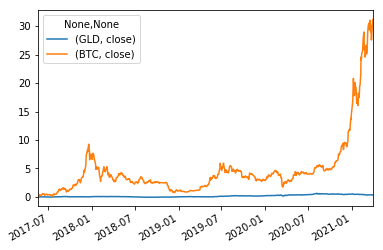

In [51]:
cumulative_returns(gold_btc).plot()

In [52]:
cumulative_returns(gold_btc).head()

,GLD,BTC
,close,close
2017-05-18,NaN,NaN
2017-05-19,0.004965,0.055135
2017-05-22,0.009050,0.156313
2017-05-23,0.002441,0.201233
2017-05-24,0.006817,0.296788
